# Configuration

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv

import preModelling.data_config as cf
import preModelling.data_loader as dl
import preModelling.utils
import preModelling.weather_cleaning as wc
import preModelling.weather_engineering as we

In [2]:
BOXPLOT_TEMP = "Boxplot of temp_c"

Load Main Weatherdata

In [3]:
weather_data_raw = dl.load_weather_data()

Load Complementary Weatherdata

In [4]:
weather_data_new_rows = read_csv(cf.WEATHER_DATA_PART_2)

 Merge Weatherdata

In [5]:
weather_data_raw = pd.concat([weather_data_raw, weather_data_new_rows])

# EDA  weather_data

## EDA general

In [6]:
weather_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5334 entries, 0 to 158
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    5334 non-null   object 
 1   temp         5334 non-null   float64
 2   windspeed    4195 non-null   float64
 3   humidity     5334 non-null   float64
 4   precip       5334 non-null   float64
 5   pressure     5200 non-null   float64
 6   conditions   5334 non-null   object 
 7   dailyprecip  5334 non-null   object 
 8   dailysnow    5334 non-null   object 
 9   fog          5334 non-null   int64  
 10  rain         5334 non-null   int64  
 11  snow         5334 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 541.7+ KB


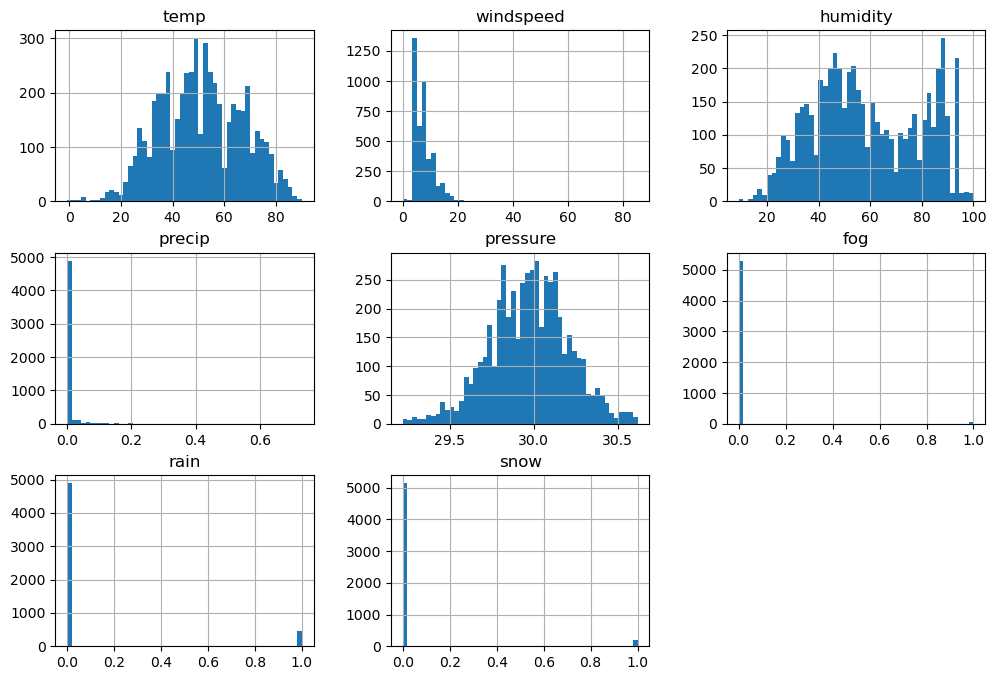

In [7]:
weather_data_raw.hist(bins=50, figsize=(12, 8))
plt.show()

In [8]:
weather_data_raw.describe()

,temp,windspeed,humidity,precip,pressure,fog,rain,snow
count,5334.000000,4195.000000,5334.000000,5334.000000,5200.000000,5334.000000,5334.000000,5334.000000
mean,51.095726,7.388272,58.662917,0.007402,29.972810,0.008999,0.083802,0.037308
std,15.997815,3.982570,20.813630,0.035561,0.235095,0.094443,0.277117,0.189533
min,-0.900000,0.000000,9.000000,0.000000,29.220000,0.000000,0.000000,0.000000
25%,39.000000,4.600000,43.000000,0.000000,29.810000,0.000000,0.000000,0.000000
50%,51.100000,6.900000,56.000000,0.000000,29.980000,0.000000,0.000000,0.000000
75%,64.000000,9.200000,78.000000,0.000000,30.130000,0.000000,0.000000,0.000000
max,90.000000,85.200000,100.000000,0.730000,30.620000,1.000000,1.000000,1.000000


In [9]:
weather_data_raw.describe(include='object')

,timestamp,conditions,dailyprecip,dailysnow
count,5334,5334,5334,5334
unique,5329,23,41,11
top,2016-04-04 02:51:00,Clear,0.00,0.00
freq,2,2238,2577,4491


- Exactly one timestamp is duplicated: 2016-03-13 00:51:00; Two different entries (Clear vs. Light
Rain), probably two weather sources or measurements.

## EDA temp

In [10]:
weather_data_raw['temp'].describe()

count    5334.000000
mean       51.095726
std        15.997815
min        -0.900000
25%        39.000000
50%        51.100000
75%        64.000000
max        90.000000
Name: temp, dtype: float64

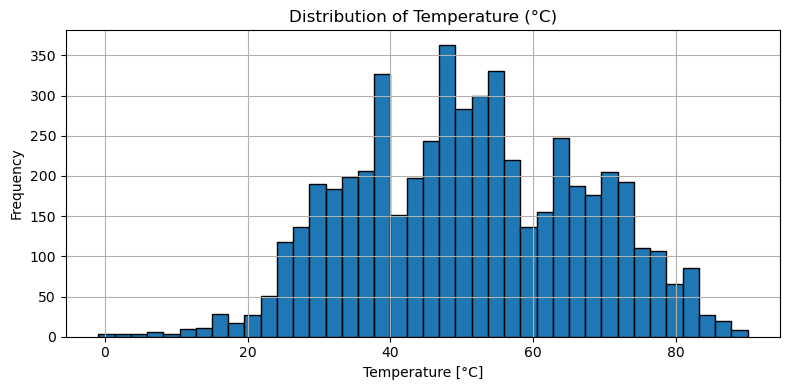

In [11]:
plt.figure(figsize=(8, 4))
weather_data_raw['temp'].plot.hist(bins=40, edgecolor='black')
plt.title('Distribution of Temperature (°C)')
plt.xlabel("Temperature [°C]")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

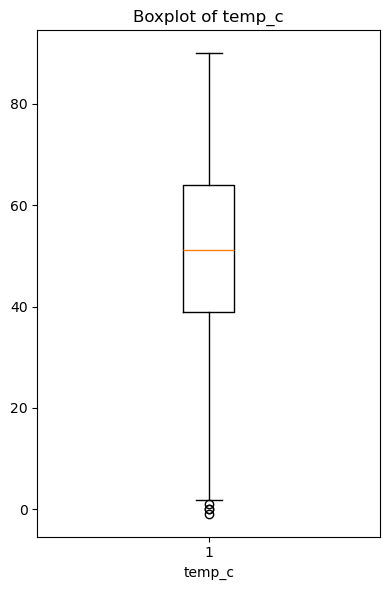

In [12]:
plt.figure(figsize=(4, 6))
plt.boxplot(weather_data_raw["temp"].dropna())
plt.title(BOXPLOT_TEMP)
plt.xlabel("temp_c")
plt.tight_layout()
plt.show()

## EDA Windspeed

In [13]:
weather_data_raw['windspeed'].describe()

count    4195.000000
mean        7.388272
std         3.982570
min         0.000000
25%         4.600000
50%         6.900000
75%         9.200000
max        85.200000
Name: windspeed, dtype: float64

In [14]:
weather_data_raw['windspeed'].isna().sum()

1139

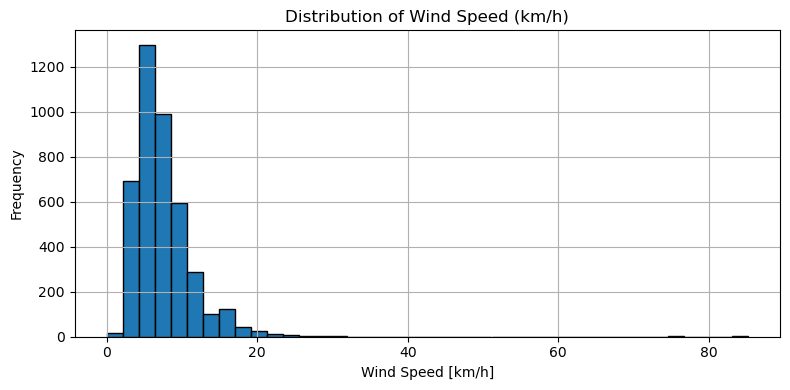

In [15]:
plt.figure(figsize=(8, 4))
weather_data_raw['windspeed'].plot.hist(bins=40, edgecolor='black')
plt.title("Distribution of Wind Speed (km/h)")
plt.xlabel("Wind Speed [km/h]")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

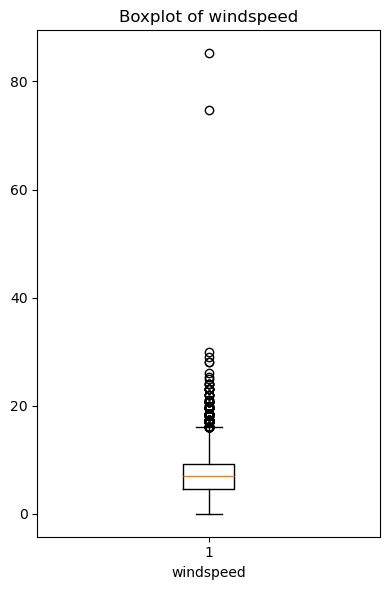

In [16]:
plt.figure(figsize=(4, 6))
plt.boxplot(weather_data_raw["windspeed"].dropna())
plt.title("Boxplot of windspeed")
plt.xlabel("windspeed")
plt.tight_layout()
plt.show()

## EDA humidity

In [17]:
weather_data_raw['humidity'].describe()

count    5334.000000
mean       58.662917
std        20.813630
min         9.000000
25%        43.000000
50%        56.000000
75%        78.000000
max       100.000000
Name: humidity, dtype: float64

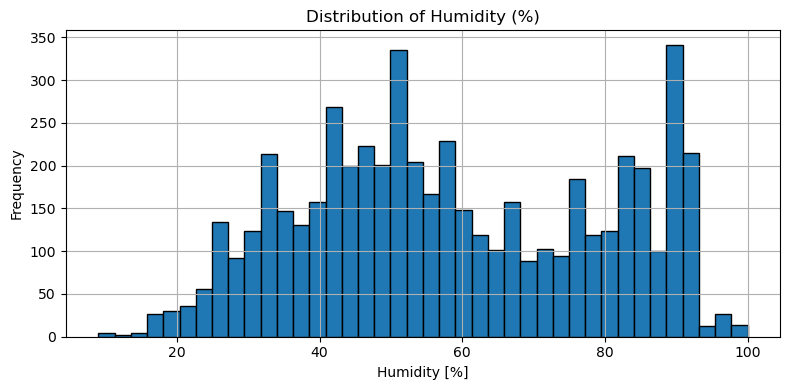

In [18]:
plt.figure(figsize=(8, 4))
weather_data_raw['humidity'].plot.hist(bins=40, edgecolor='black')
plt.title("Distribution of Humidity (%)")
plt.xlabel("Humidity [%]")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

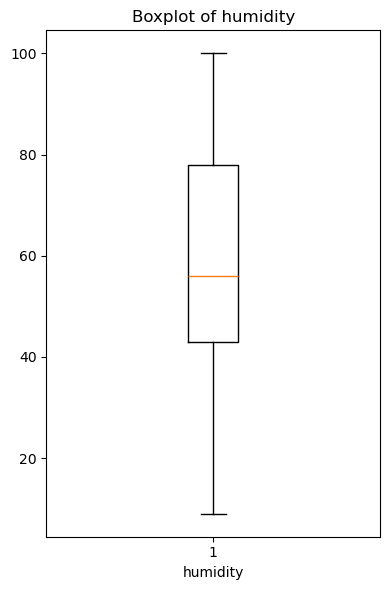

In [19]:
plt.figure(figsize=(4, 6))
plt.boxplot(weather_data_raw["humidity"].dropna())
plt.title("Boxplot of humidity")
plt.xlabel("humidity")
plt.tight_layout()
plt.show()

- Values range from 9% to 97%.
- Most values lie between 40% and 70%.
- No anomalies or unrealistic entries.

## EDA precip

In [20]:
weather_data_raw['precip'].describe()

count    5334.000000
mean        0.007402
std         0.035561
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.730000
Name: precip, dtype: float64

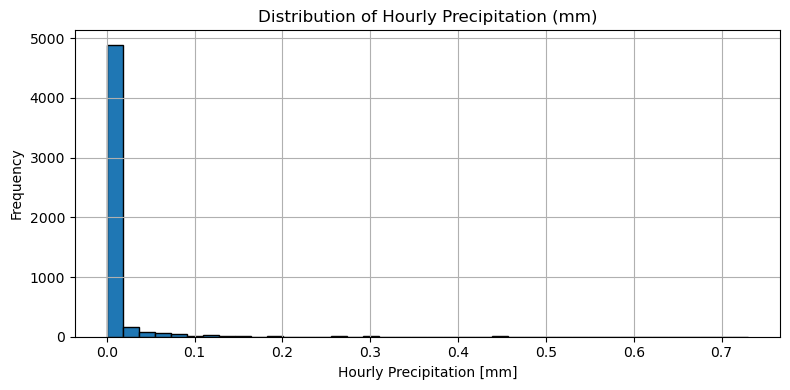

In [21]:
plt.figure(figsize=(8, 4))
weather_data_raw['precip'].plot.hist(bins=40, edgecolor='black')
plt.title("Distribution of Hourly Precipitation (mm)")
plt.xlabel("Hourly Precipitation [mm]")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

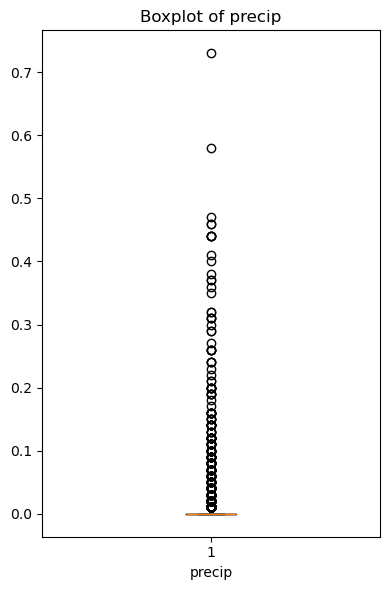

In [22]:
plt.figure(figsize=(4, 6))
plt.boxplot(weather_data_raw["precip"].dropna())
plt.title("Boxplot of precip")
plt.xlabel("precip")
plt.tight_layout()
plt.show()

## EDA pressure

In [23]:
weather_data_raw['pressure'].describe()

count    5200.000000
mean       29.972810
std         0.235095
min        29.220000
25%        29.810000
50%        29.980000
75%        30.130000
max        30.620000
Name: pressure, dtype: float64

In [24]:
weather_data_raw['pressure'].isna().sum()

134

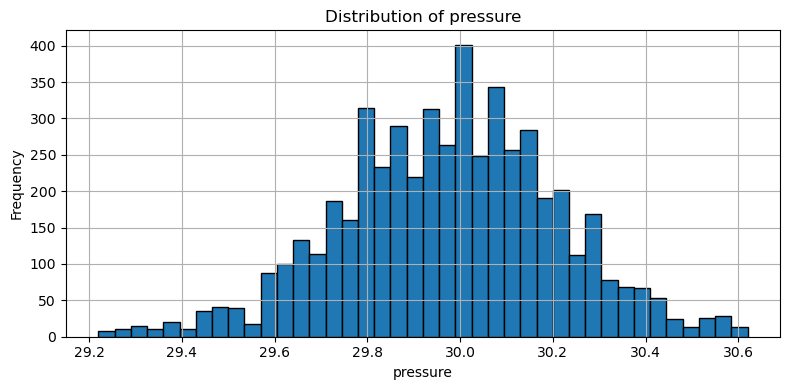

In [25]:
plt.figure(figsize=(8, 4))
weather_data_raw['pressure'].plot.hist(bins=40, edgecolor='black')
plt.title("Distribution of pressure")
plt.xlabel("pressure")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

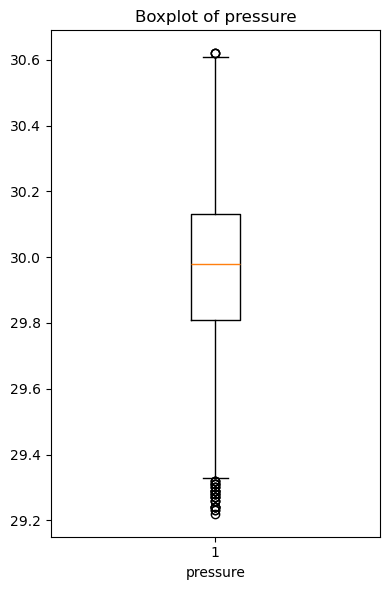

In [26]:
plt.figure(figsize=(4, 6))
plt.boxplot(weather_data_raw["pressure"].dropna())
plt.title("Boxplot of pressure")
plt.xlabel("pressure")
plt.tight_layout()
plt.show()

## EDA daily rain

In [27]:
weather_data_raw['dailyprecip'].value_counts()

dailyprecip
0.00    2577
T        511
0.01     235
0.04     134
0.05     126
0.16     105
0.09      99
0.0       95
0.02      87
0.24      75
1.22      71
0.06      70
1.01      60
1.65      56
0.11      56
0.45      55
0.61      55
0.12      53
0.54      49
0.91      47
0.38      46
1.80      46
0.44      46
2.31      45
0.53      44
0.73      41
0.5       40
0.83      38
0.30      38
0.07      37
0.29      34
0.40      33
0.22      31
0.15      29
0.14      27
0.18      25
0.20      24
0.03      24
0.01      24
0.25      23
0.47      23
Name: count, dtype: int64

In [28]:
weather_data_raw['dailyprecip'].isna().sum()

0

In [29]:
weather_data_raw['dailyprecip'].describe()

count     5334
unique      41
top       0.00
freq      2577
Name: dailyprecip, dtype: object

## EDA dailysnow

In [30]:
weather_data_raw['dailysnow'].value_counts()

dailysnow
0.00     4491
T         347
0.0       158
0.40       90
1.40       46
26.60      45
2.50       44
0.10       44
0.50       41
0.20       27
0.1         1
Name: count, dtype: int64

In [31]:
weather_data_raw['dailysnow'].describe()

count     5334
unique      11
top       0.00
freq      4491
Name: dailysnow, dtype: object

In [32]:
weather_data_raw['dailysnow'].isna().sum()

0

EDA fog, rain, snow

In [33]:
weather_data_raw['fog'].value_counts()

fog
0    5286
1      48
Name: count, dtype: int64

In [34]:
weather_data_raw['fog'].isna().sum()

0

In [35]:
weather_data_raw['rain'].value_counts()

rain
0    4887
1     447
Name: count, dtype: int64

In [36]:
weather_data_raw['rain'].isna().sum()

0

In [37]:
weather_data_raw['snow'].value_counts()

snow
0    5135
1     199
Name: count, dtype: int64

In [38]:
weather_data_raw['snow'].isna().sum()

0

## EDA Conditions

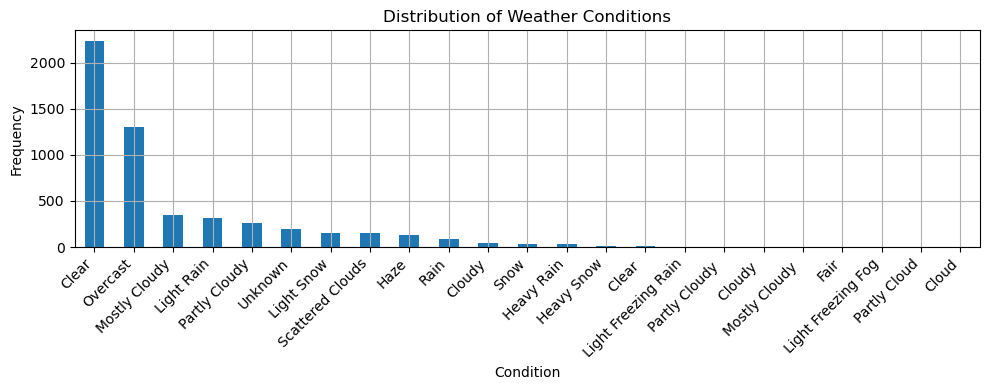

In [39]:
condition_counts = weather_data_raw['conditions'].value_counts()

plt.figure(figsize=(10, 4))
condition_counts.plot(kind='bar')
plt.title("Distribution of Weather Conditions")
plt.xlabel("Condition")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
weather_data_raw['conditions'].isna().sum()

0

- Most common condition is Clear (2215 times), followed by Overcast (1000).
- Some conditions occur only a few times, e.g., Heavy Snow, Light Freezing Fog.
- Unknown appears 83 times and may indicate missing or invalid sensor data.

# Cleaning & Imputation

In [41]:
weather_data = weather_data_raw.copy()

## Timestamp

In [42]:
weather_data = preModelling.utils.timestamp_to_datetime(weather_data, 'timestamp', 'datetime')

## Temp

In [43]:
weather_data = wc.fahrenheit_to_celsius(weather_data, 'temp', 'temp_c')

In [44]:
wc.get_outliers(weather_data, 'temp_c')

,timestamp,temp,windspeed,humidity,precip,pressure,conditions,dailyprecip,dailysnow,fog,rain,snow,datetime,temp_c
1244,2016-02-14 05:51:00,1.0,16.1,41.0,0.0,30.44,Clear,0.00,0.00,0,0,0,2016-02-14 05:51:00,-17.222222
1245,2016-02-14 06:51:00,-0.0,NaN,43.0,0.0,30.48,Clear,0.00,0.00,0,0,0,2016-02-14 06:51:00,-17.777778
1246,2016-02-14 07:51:00,-0.9,12.7,44.0,0.0,30.52,Clear,0.00,0.00,0,0,0,2016-02-14 07:51:00,-18.277778
1247,2016-02-14 08:51:00,-0.0,6.9,41.0,0.0,30.53,Clear,0.00,0.00,0,0,0,2016-02-14 08:51:00,-17.777778


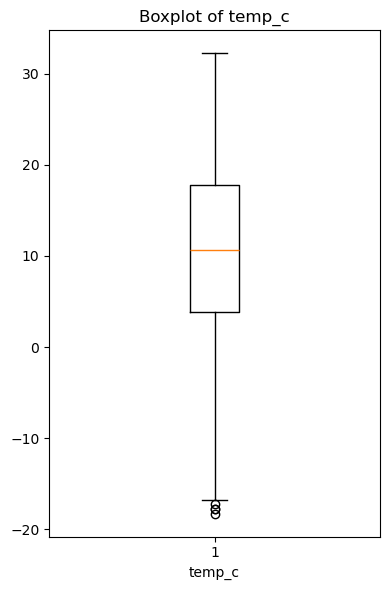

In [45]:
plt.figure(figsize=(4, 6))
plt.boxplot(weather_data["temp_c"].dropna())
plt.title(BOXPLOT_TEMP)
plt.xlabel("temp_c")
plt.tight_layout()
plt.show()

## Windspeed

In [46]:
weather_data = wc.miles_to_kilometers(weather_data, 'windspeed', 'windspeed_kph')

In [47]:
wc.get_outliers(weather_data, 'windspeed_kph')

,timestamp,temp,windspeed,humidity,precip,pressure,conditions,dailyprecip,dailysnow,fog,rain,snow,datetime,temp_c,windspeed_kph
239,2016-01-10 04:51:00,45.0,17.3,90.0,0.20,29.82,Heavy Rain,1.80,0.00,0,1,0,2016-01-10 04:51:00,7.222222,27.841582
240,2016-01-10 05:02:00,45.0,17.3,90.0,0.07,29.84,Heavy Rain,1.80,0.00,0,1,0,2016-01-10 05:02:00,7.222222,27.841582
241,2016-01-10 05:37:00,45.0,18.4,90.0,0.26,29.78,Light Rain,1.80,0.00,0,1,0,2016-01-10 05:37:00,7.222222,29.611856
322,2016-01-12 21:51:00,33.1,16.1,56.0,0.00,29.68,Mostly Cloudy,T,T,0,0,0,2016-01-12 21:51:00,0.611111,25.910374
323,2016-01-12 22:51:00,32.0,20.7,56.0,0.00,29.69,Scattered Clouds,T,T,0,0,0,2016-01-12 22:51:00,0.000000,33.313338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2016-05-16 13:51:00,62.0,24.0,26.0,0.00,30.00,Clear,0.0,0.0,0,0,0,2016-05-16 13:51:00,16.666667,38.624160
138,2016-05-16 14:51:00,64.0,24.0,23.0,0.00,29.99,Clear,0.0,0.0,0,0,0,2016-05-16 14:51:00,17.777778,38.624160
139,2016-05-16 15:51:00,65.0,30.0,27.0,0.00,29.99,Clear,0.0,0.0,0,0,0,2016-05-16 15:51:00,18.333333,48.280200
140,2016-05-16 16:51:00,67.0,26.0,26.0,0.00,29.99,Clear,0.0,0.0,0,0,0,2016-05-16 16:51:00,19.444444,41.842840


In [48]:
weather_data = wc.flag_and_clip(weather_data, 'windspeed_kph', 'windspeed_outliers', 0, 120)

In [49]:
weather_data_before_imputation = weather_data

In [50]:
weather_data = wc.interpolate_time_series(weather_data, 'windspeed_kph', 'datetime', 'time')

In [51]:
before = weather_data_before_imputation['windspeed_kph']
after = weather_data['windspeed_kph']

print("mean before:", before.mean())
print("mean after:", after.mean())
print("std deviation before:", before.std())
print("std deviation after:", after.std())

mean before: 11.886070963528008
mean after: 11.33378162102205
std deviation before: 6.333042595420593
std deviation after: 6.362707059268071


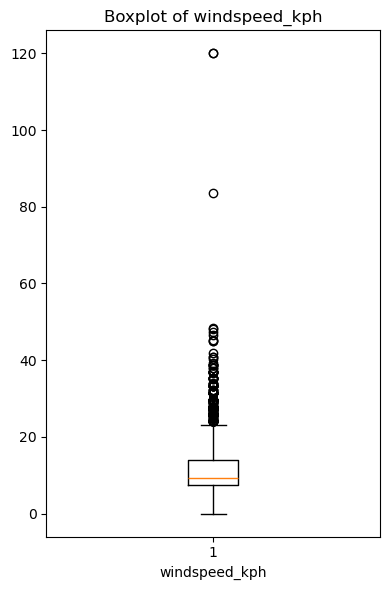

In [52]:
plt.figure(figsize=(4, 6))
plt.boxplot(weather_data["windspeed_kph"].dropna())
plt.title("Boxplot of windspeed_kph")
plt.xlabel("windspeed_kph")
plt.tight_layout()
plt.show()

## Precip

In [53]:
weather_data = wc.inch_to_millimeters(weather_data, 'precip', 'precip_mm')

In [54]:
wc.get_outliers(weather_data, 'precip_mm')

,datetime,timestamp,temp,windspeed,humidity,precip,pressure,conditions,dailyprecip,dailysnow,fog,rain,snow,temp_c,windspeed_kph,windspeed_outliers,precip_mm
234,2016-01-10 03:47:00,2016-01-10 03:47:00,44.6,11.5,93.0,0.04,29.90,Rain,1.80,0.00,0,1,0,7.000000,18.507410,False,1.016
235,2016-01-10 03:51:00,2016-01-10 03:51:00,45.0,10.4,90.0,0.05,29.88,Rain,1.80,0.00,0,1,0,7.222222,16.737136,False,1.270
236,2016-01-10 04:12:00,2016-01-10 04:12:00,45.0,9.2,90.0,0.05,29.88,Rain,1.80,0.00,0,1,0,7.222222,14.805928,False,1.270
237,2016-01-10 04:39:00,2016-01-10 04:39:00,45.0,13.8,90.0,0.14,29.85,Rain,1.80,0.00,0,1,0,7.222222,22.208892,False,3.556
238,2016-01-10 04:41:00,2016-01-10 04:41:00,45.0,15.0,90.0,0.14,29.84,Heavy Rain,1.80,0.00,0,1,0,7.222222,24.140100,False,3.556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5240,2016-05-13 19:17:00,2016-05-13 19:17:00,63.0,0.0,100.0,0.01,29.74,Light Rain,0.5,0.0,0,1,0,17.222222,0.000000,False,0.254
5241,2016-05-13 19:47:00,2016-05-13 19:47:00,64.0,0.0,100.0,0.01,29.74,Light Rain,0.5,0.0,0,1,0,17.777778,0.000000,False,0.254
5268,2016-05-14 20:51:00,2016-05-14 20:51:00,63.0,14.0,74.0,0.01,29.61,Light Rain,0.0,0.0,0,1,0,17.222222,22.530760,False,0.254
5283,2016-05-15 11:51:00,2016-05-15 11:51:00,55.0,17.0,51.0,0.01,29.75,Light Rain,0.01,0.0,0,1,0,12.777778,27.358780,False,0.254


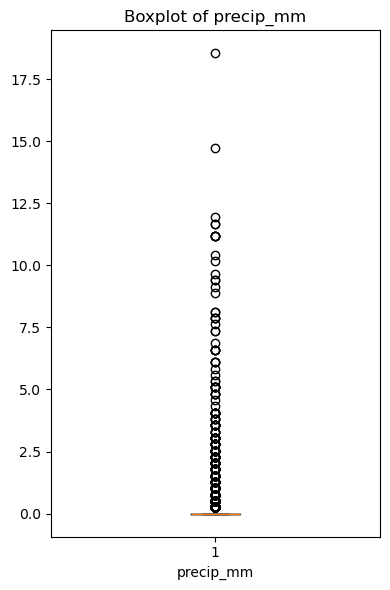

In [55]:
plt.figure(figsize=(4, 6))
plt.boxplot(weather_data["precip_mm"].dropna())
plt.title("Boxplot of precip_mm")
plt.xlabel("precip_mm")
plt.tight_layout()
plt.show()

## humidity

In [56]:
wc.get_outliers(weather_data, 'humidity')

,datetime,timestamp,temp,windspeed,humidity,precip,pressure,conditions,dailyprecip,dailysnow,fog,rain,snow,temp_c,windspeed_kph,windspeed_outliers,precip_mm


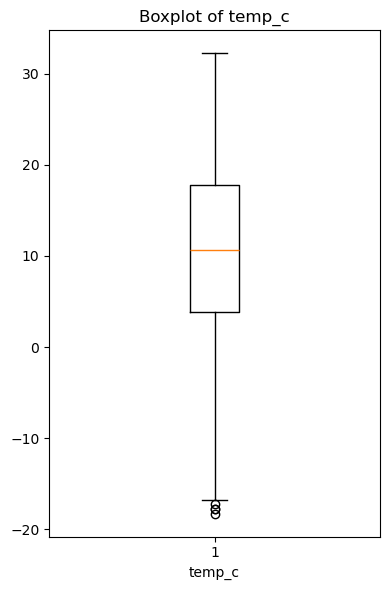

In [57]:
plt.figure(figsize=(4, 6))
plt.boxplot(weather_data["temp_c"].dropna())
plt.title(BOXPLOT_TEMP)
plt.xlabel("temp_c")
plt.tight_layout()
plt.show()

## Pressure

In [58]:
weather_data = wc.inch_mercury_to_hpa(weather_data, 'pressure', 'pressure_hpa')

In [59]:
wc.get_outliers(weather_data, 'pressure_hpa')

,datetime,timestamp,temp,windspeed,humidity,precip,pressure,conditions,dailyprecip,dailysnow,fog,rain,snow,temp_c,windspeed_kph,windspeed_outliers,precip_mm,pressure_hpa
110,2016-01-05 18:51:00,2016-01-05 18:51:00,27.0,NaN,27.0,0.00,30.62,Clear,0.00,0.00,0,0,0,-2.777778,6.222781,False,0.000,1036.912618
111,2016-01-05 19:51:00,2016-01-05 19:51:00,28.0,NaN,27.0,0.00,30.62,Clear,0.00,0.00,0,0,0,-2.222222,5.927736,False,0.000,1036.912618
112,2016-01-05 20:51:00,2016-01-05 20:51:00,28.9,3.5,26.0,0.00,30.62,Clear,0.00,0.00,0,0,0,-1.722222,5.632690,False,0.000,1036.912618
265,2016-01-10 14:51:00,2016-01-10 14:51:00,57.0,3.5,89.0,0.00,29.30,Overcast,1.80,0.00,0,0,0,13.888889,5.632690,False,0.000,992.212270
266,2016-01-10 15:08:00,2016-01-10 15:08:00,57.0,8.1,89.0,0.00,29.31,Overcast,1.80,0.00,0,0,0,13.888889,13.035654,False,0.000,992.550909
267,2016-01-10 15:26:00,2016-01-10 15:26:00,57.0,5.8,87.0,0.00,29.31,Scattered Clouds,1.80,0.00,0,0,0,13.888889,9.334172,False,0.000,992.550909
268,2016-01-10 15:51:00,2016-01-10 15:51:00,57.0,12.7,87.0,0.01,29.28,Light Rain,1.80,0.00,0,1,0,13.888889,20.438618,False,0.254,991.534992
1626,2016-02-24 23:51:00,2016-02-24 23:51:00,59.0,4.6,90.0,0.09,29.32,Overcast,1.22,0.00,0,0,0,15.000000,7.402964,False,2.286,992.889548
1628,2016-02-25 00:51:00,2016-02-25 00:51:00,59.0,5.8,87.0,0.01,29.32,Overcast,0.02,0.00,0,0,0,15.000000,9.334172,False,0.254,992.889548
1629,2016-02-25 01:30:00,2016-02-25 01:30:00,59.0,11.5,90.0,0.01,29.32,Overcast,0.02,0.00,0,0,0,15.000000,18.507410,False,0.254,992.889548


In [60]:
weather_data_before_imputation = weather_data

In [61]:
weather_data = wc.interpolate_time_series(weather_data, 'pressure_hpa', 'datetime', 'time')

In [62]:
before = weather_data_before_imputation['pressure_hpa']
after = weather_data['pressure_hpa']

print("mean before:", before.mean())
print("mean after:", after.mean())
print("std deviation before:", before.std())
print("std deviation after:", after.std())

mean before: 1014.996227534423
mean after: 1014.9730842937721
std deviation before: 7.961223793716727
std deviation after: 7.923269754378345


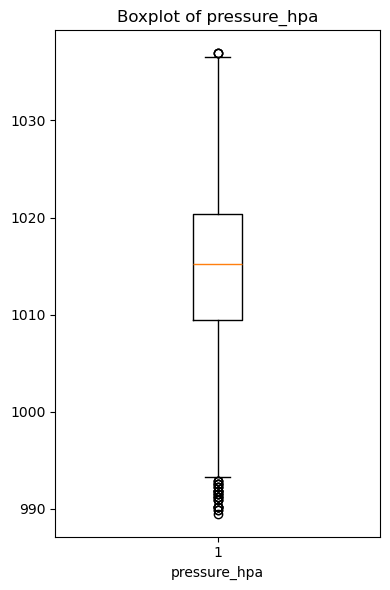

In [63]:
plt.figure(figsize=(4, 6))
plt.boxplot(weather_data["pressure_hpa"].dropna())
plt.title("Boxplot of pressure_hpa")
plt.xlabel("pressure_hpa")
plt.tight_layout()
plt.show()

## dailyprecip

In [64]:
weather_data = wc.clean_trace_and_convert(weather_data, ['dailyprecip'], 0.01)

In [65]:
weather_data = wc.inch_to_millimeters(weather_data, 'dailyprecip', 'daily_precip_mm')

In [66]:
wc.get_outliers(weather_data, 'daily_precip_mm')

,datetime,timestamp,temp,windspeed,humidity,precip,pressure,conditions,dailyprecip,dailysnow,fog,rain,snow,temp_c,windspeed_kph,windspeed_outliers,precip_mm,pressure_hpa,daily_precip_mm
231,2016-01-10 00:51:00,2016-01-10 00:51:00,46.0,10.4,86.0,0.00,30.01,Overcast,1.8,0.00,0,0,0,7.777778,16.737136,False,0.000,1016.255639,45.72
232,2016-01-10 01:51:00,2016-01-10 01:51:00,46.0,11.5,86.0,0.00,29.96,Overcast,1.8,0.00,0,0,0,7.777778,18.507410,False,0.000,1014.562444,45.72
233,2016-01-10 02:51:00,2016-01-10 02:51:00,46.0,15.0,86.0,0.00,29.92,Light Rain,1.8,0.00,0,1,0,7.777778,24.140100,False,0.000,1013.207888,45.72
234,2016-01-10 03:47:00,2016-01-10 03:47:00,44.6,11.5,93.0,0.04,29.90,Rain,1.8,0.00,0,1,0,7.000000,18.507410,False,1.016,1012.530610,45.72
235,2016-01-10 03:51:00,2016-01-10 03:51:00,45.0,10.4,90.0,0.05,29.88,Rain,1.8,0.00,0,1,0,7.222222,16.737136,False,1.270,1011.853332,45.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5242,2016-05-13 19:51:00,2016-05-13 19:51:00,65.0,0.0,97.0,0.00,29.74,Mostly Cloudy,0.5,0.0,0,0,0,18.333333,0.000000,False,0.000,1007.112386,12.70
5243,2016-05-13 20:51:00,2016-05-13 20:51:00,65.0,0.0,93.0,0.00,29.75,Mostly Cloudy,0.5,0.0,0,0,0,18.333333,0.000000,False,0.000,1007.451025,12.70
5244,2016-05-13 21:51:00,2016-05-13 21:51:00,66.0,5.0,90.0,0.00,29.77,Mostly Cloudy,0.5,0.0,0,0,0,18.888889,8.046700,False,0.000,1008.128303,12.70
5245,2016-05-13 22:51:00,2016-05-13 22:51:00,65.0,8.0,93.0,0.00,29.77,Partly Cloudy,0.5,0.0,0,0,0,18.333333,12.874720,False,0.000,1008.128303,12.70


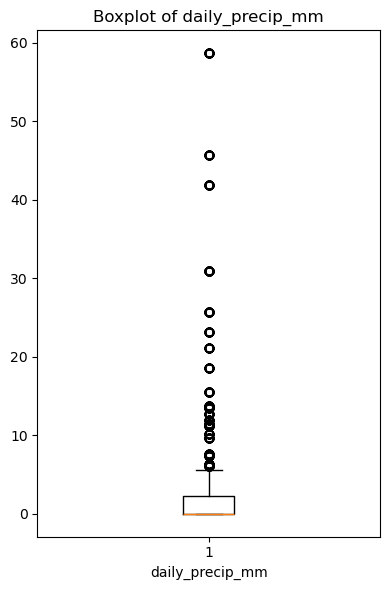

In [67]:
plt.figure(figsize=(4, 6))
plt.boxplot(weather_data["daily_precip_mm"].dropna())
plt.title("Boxplot of daily_precip_mm")
plt.xlabel("daily_precip_mm")
plt.tight_layout()
plt.show()

## dailysnow

In [68]:
weather_data = wc.clean_trace_and_convert(weather_data, ['dailysnow'], 0.1)

In [69]:
weather_data = wc.inch_to_millimeters(weather_data, 'dailysnow', 'daily_snow_mm')

In [70]:
weather_data = wc.flag_and_clip(weather_data, 'daily_snow_mm', 'daily_snow_outliers', 0, 60)

In [71]:
wc.get_outliers(weather_data, 'daily_snow_mm')

,datetime,timestamp,temp,windspeed,humidity,precip,pressure,conditions,dailyprecip,dailysnow,...,rain,snow,temp_c,windspeed_kph,windspeed_outliers,precip_mm,pressure_hpa,daily_precip_mm,daily_snow_mm,daily_snow_outliers
301,2016-01-12 00:51:00,2016-01-12 00:51:00,25.0,5.8,39.0,0.0,30.09,Clear,0.01,0.1,...,0,0,-3.888889,9.334172,False,0.00,1018.964751,0.254,2.54,False
302,2016-01-12 01:51:00,2016-01-12 01:51:00,25.0,NaN,37.0,0.0,30.10,Clear,0.01,0.1,...,0,0,-3.888889,9.334172,False,0.00,1019.303390,0.254,2.54,False
303,2016-01-12 02:51:00,2016-01-12 02:51:00,25.0,NaN,39.0,0.0,30.10,Clear,0.01,0.1,...,0,0,-3.888889,9.334172,False,0.00,1019.303390,0.254,2.54,False
304,2016-01-12 03:51:00,2016-01-12 03:51:00,26.1,5.8,39.0,0.0,30.09,Clear,0.01,0.1,...,0,0,-3.277778,9.334172,False,0.00,1018.964751,0.254,2.54,False
305,2016-01-12 04:51:00,2016-01-12 04:51:00,26.1,4.6,43.0,0.0,30.08,Clear,0.01,0.1,...,0,0,-3.277778,7.402964,False,0.00,1018.626112,0.254,2.54,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848,2016-04-09 20:51:00,2016-04-09 20:51:00,42.1,3.5,60.0,0.0,29.87,Overcast,0.09,0.1,...,0,0,5.611111,5.632690,False,0.00,1011.514693,2.286,2.54,False
2849,2016-04-09 21:51:00,2016-04-09 21:51:00,42.1,8.1,47.0,0.0,29.91,Overcast,0.09,0.1,...,0,0,5.611111,13.035654,False,0.00,1012.869249,2.286,2.54,False
2850,2016-04-09 22:51:00,2016-04-09 22:51:00,39.9,3.5,43.0,0.0,29.95,Overcast,0.09,0.1,...,0,0,4.388889,5.632690,False,0.00,1014.223805,2.286,2.54,False
2851,2016-04-09 23:51:00,2016-04-09 23:51:00,37.9,9.2,45.0,0.0,30.00,Partly Cloudy,0.09,0.1,...,0,0,3.277778,14.805928,False,0.00,1015.917000,2.286,2.54,False


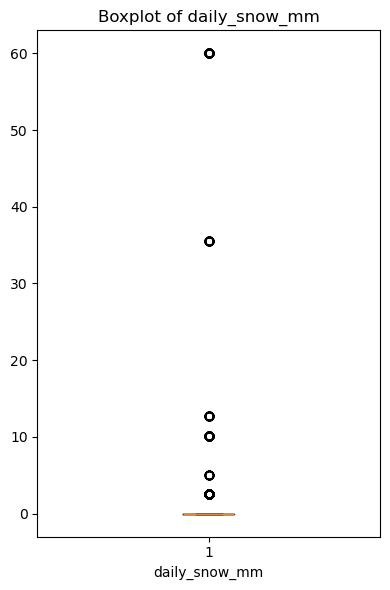

In [72]:
plt.figure(figsize=(4, 6))
plt.boxplot(weather_data["daily_snow_mm"].dropna())
plt.title("Boxplot of daily_snow_mm")
plt.xlabel("daily_snow_mm")
plt.tight_layout()
plt.show()

# Drop features

In [73]:
# Drop columns if they exist in the DataFrame
cols_to_drop = ['temp', 'windspeed', 'precip', 'pressure', 'dailyprecip', 'dailysnow',
                'timestamp', 'windspeed_outliers', 'daily_snow_outliers']
weather_data.drop(
    columns=[col for col in cols_to_drop if col in weather_data.columns],
    inplace=True
)

# Feature engineering

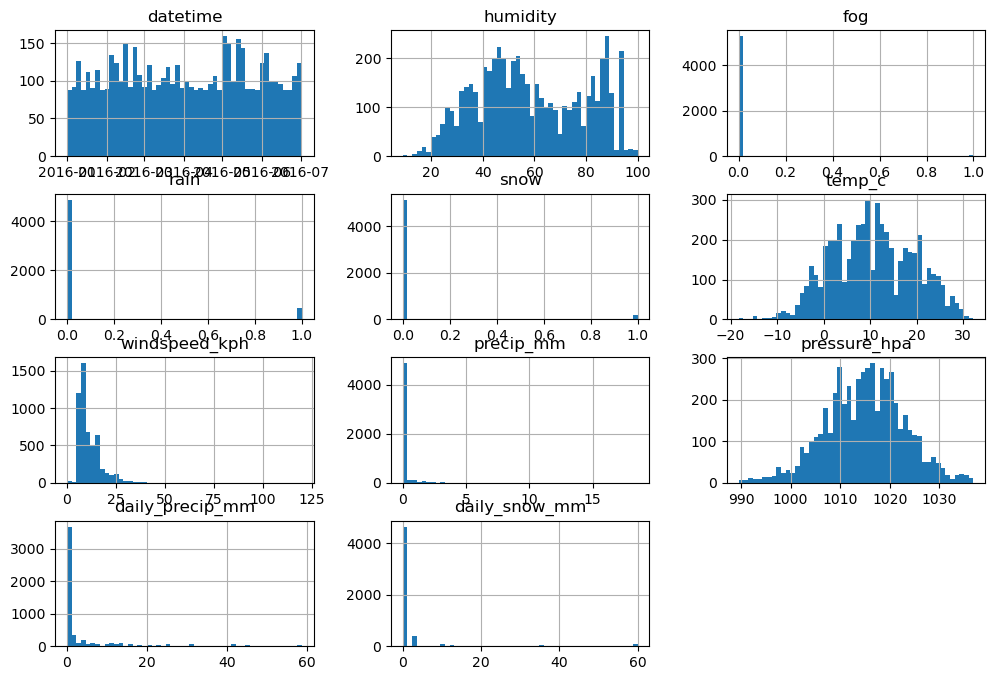

In [74]:
weather_data.hist(bins=50, figsize=(12, 8))
plt.show()

## Add Time features

In [75]:
weather_data = preModelling.utils.add_time_features(weather_data, 'datetime')

## classify features

### split rain and snow

In [76]:
weather_data = we.split_precip_into_rain_and_snow(weather_data)

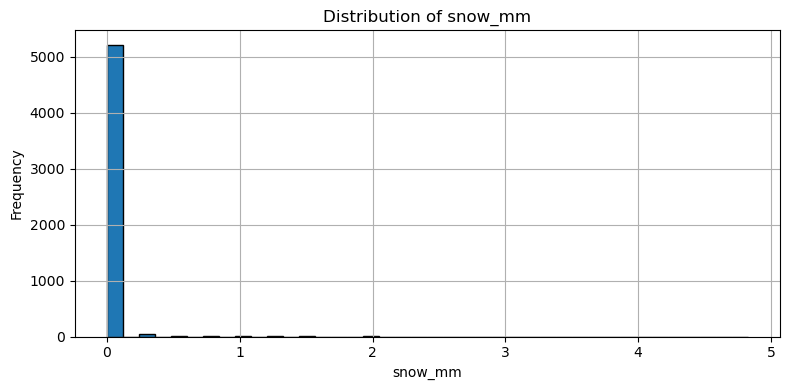

In [77]:
plt.figure(figsize=(8, 4))
weather_data['snow_mm'].plot.hist(bins=40, edgecolor='black')
plt.title("Distribution of snow_mm")
plt.xlabel("snow_mm")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


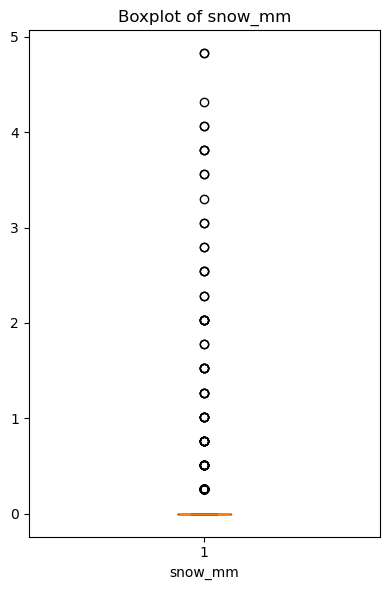

In [78]:
plt.figure(figsize=(4, 6))
plt.boxplot(weather_data["snow_mm"].dropna())
plt.title("Boxplot of snow_mm")
plt.xlabel("snow_mm")
plt.tight_layout()
plt.show()

### classify

In [79]:
we.classify_temp(weather_data)
weather_data['temp_class'].value_counts()

temp_class
cool         2097
cold         1437
mild          722
warm          655
hot           261
very_cold     162
Name: count, dtype: int64

In [80]:
we.classify_windspeed(weather_data)
weather_data['windspeed_class'].value_counts()

windspeed_class
light_breeze     2818
light_wind       1984
moderate_wind     423
fresh_wind         54
light_air          22
calm               19
strong_wind        11
hurricane           2
storm               1
Name: count, dtype: int64

In [81]:
we.classify_humidity(weather_data)
weather_data['humidity_class'].value_counts()

humidity_class
dry         1741
normal      1409
wet          898
very_wet     841
very_dry     445
Name: count, dtype: int64

In [82]:
we.classify_rain(weather_data)
weather_data['rain_class'].value_counts()

rain_class
no_rain          4968
light_rain        281
moderate_rain      76
heavy_rain          9
Name: count, dtype: int64

In [83]:
we.classify_pressure(weather_data)
weather_data['pressure_class'].value_counts()

pressure_class
normal       3794
high         1213
low           182
very_high     145
Name: count, dtype: int64

In [84]:
we.classify_fog(weather_data)
weather_data['fog_class'].value_counts()

fog_class
no_fog    5286
fog         48
Name: count, dtype: int64

In [85]:
we.classify_snow(weather_data)
weather_data['snow_class'].value_counts()

snow_class
no_snow          5210
light_snow         81
moderate_snow      43
Name: count, dtype: int64

In [86]:
we.classify_clouds(weather_data)
weather_data['cloud_class'].value_counts()

cloud_class
clear               2238
overcast            1304
unknown             1044
mostly_cloudy        343
partly_cloudy        257
scattered_clouds     148
Name: count, dtype: int64

In [87]:
n_unknown = weather_data['cloud_class'].eq('unknown').sum()
print(f"number 'unknown' cloud_class: {n_unknown}")

number 'unknown' cloud_class: 1044


In [88]:
mask_unknown_rain_snow = (
    (weather_data['cloud_class'] == 'unknown') &
    ((weather_data['rain'] == 1) | (weather_data['snow'] == 1))
)
print(f"→ rain/snow: {mask_unknown_rain_snow.sum()}")

→ rain/snow: 646


In [89]:
print("\nConditions bei 'unknown' + precip:")
print(weather_data.loc[mask_unknown_rain_snow, 'conditions'].value_counts())


Conditions bei 'unknown' + precip:
conditions
Light Rain             318
Light Snow             153
Rain                    88
Snow                    38
Heavy Rain              36
Heavy Snow               8
Light Freezing Rain      5
Name: count, dtype: int64


In [90]:
weather_data = we.fix_unknown_cloud_classes(weather_data)

In [91]:
we.classify_haze(weather_data)
weather_data['hazy_class'].value_counts()

hazy_class
no_haze    5202
haze        132
Name: count, dtype: int64

In [92]:
we.classify_freezing(weather_data)
weather_data['freezing_class'].value_counts()

freezing_class
no_freezing_rain_fog    5328
light_freezing_rain        5
light_freezing_fog         1
Name: count, dtype: int64

# Add distributions

In [93]:
weather_data['windspeed_kph_sqrt'] = np.sqrt(weather_data['windspeed_kph'])

# Aggregate Weather data

Weather Observations per Hour


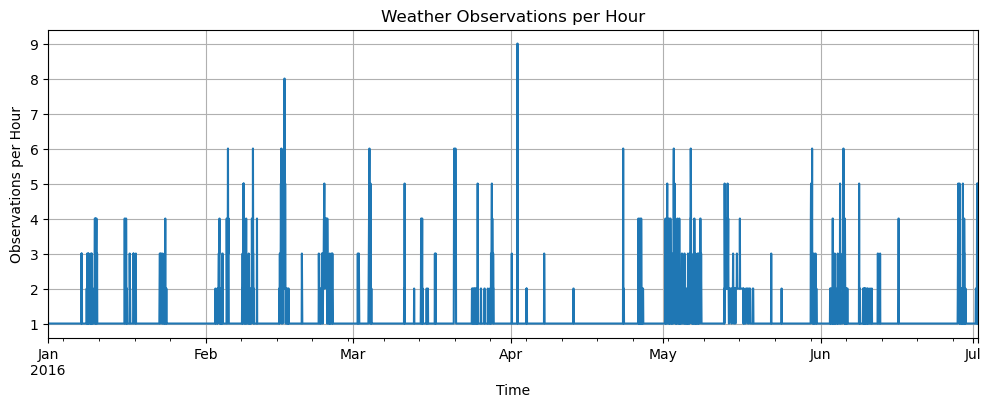

In [94]:
counts_per_hour = weather_data['datetime_hour'].value_counts().sort_index()

# Plot time series frequency
plt.figure(figsize=(12, 4))
counts_per_hour.plot()
plt.title("Weather Observations per Hour")
plt.xlabel("Time")
plt.ylabel("Observations per Hour")
plt.grid(True)
plt.show()

- The timestamps are predominantly distributed hourly, with slight fluctuations.
- There are some dips in frequency; potentially missing hours.
- The data does not appear to be exactly on the hour (e.g. xx:51).

Check how many records per minute/h


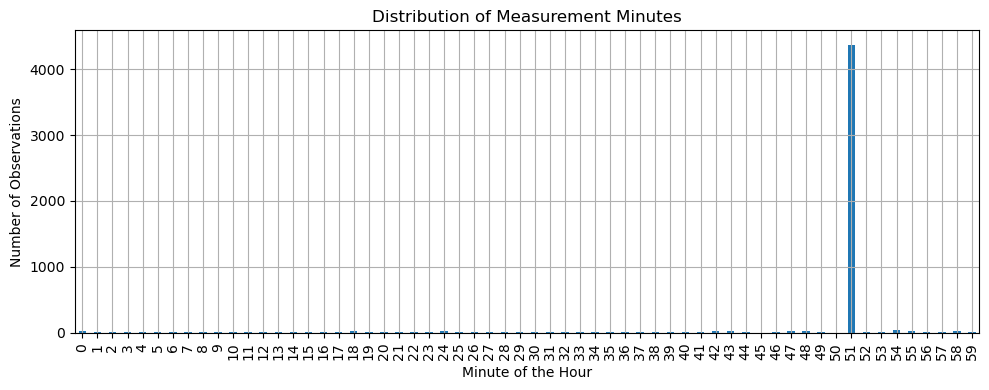

In [95]:
# Extract minute component from datetime
weather_data['datetime_minute'] = weather_data['datetime'].dt.minute

# Count how many records fall into each minute of the hour
minute_distribution = weather_data['datetime_minute'].value_counts().sort_index()

# Plot the distribution of measurement minutes
plt.figure(figsize=(10, 4))
minute_distribution.plot(kind='bar')
plt.title("Distribution of Measurement Minutes")
plt.xlabel("Minute of the Hour")
plt.ylabel("Number of Observations")
plt.grid(True)
plt.tight_layout()
plt.show()

- Minute 51 is by far the most frequent minute of measurement (over 4000 entries).
- All other minutes are rare or sporadic → probably exceptions, manual additions or other sources.

In [96]:
weather_data.to_csv(cf.WEATHER_DATA_SAVE_WITH_CLASS, index=True)

In [97]:
# Aggregate to hourly level using mean for continuous values, max for binary flags
weather_data = we.aggregate_weather_hourly(weather_data)

In [98]:
weather_data = we.classify_weather_data(weather_data)

In [99]:
weather_data = preModelling.utils.add_time_features_datetime_hour(weather_data)

In [100]:
drop_cols = [
  'timestamp', 'datetime', 'precip', 'temp', 'windspeed',
  'fog_class', 'rain_class', 'snow_class', 'cloud_class',
  'dailyprecip', 'dailysnow', 'conditions', 'precip_mm', 'temp_class', 'windspeed_class',
  'humidity_class', 'pressure_class', 'hazy_class', 'freezing_class', 'datetime_hour'
]
weather_data = weather_data.drop(columns=[col for col in drop_cols if col in weather_data.columns])

# Save to csv

In [101]:
import os

# Ensure the directory exists
output_dir = os.path.dirname(cf.WEATHER_DATA_DIR)
os.makedirs(output_dir, exist_ok=True)

# Save the DataFrame to CSV
weather_data.to_csv(cf.WEATHER_DATA_SAVE, index=False)

In [102]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temp_c              4392 non-null   float64
 1   windspeed_kph       4392 non-null   float64
 2   humidity            4392 non-null   float64
 3   pressure_hpa        4392 non-null   float64
 4   daily_precip_mm     4392 non-null   float64
 5   daily_snow_mm       4392 non-null   float64
 6   rain_mm             4392 non-null   float64
 7   snow_mm             4392 non-null   float64
 8   windspeed_kph_sqrt  4392 non-null   float64
 9   fog                 4392 non-null   int64  
 10  rain                4392 non-null   int64  
 11  snow                4392 non-null   int64  
 12  cloud_missing_flag  4392 non-null   int64  
 13  temp_code           4392 non-null   int64  
 14  windspeed_code      4392 non-null   int64  
 15  humidity_code       4392 non-null   int64  
 16  fog_co